In [ ]:
def mult_pol(s1, s2):
    res = [0]*(len(s1)+len(s2)-1)
    for o1,i1 in enumerate(s1):
        for o2,i2 in enumerate(s2):
            res[o1+o2] += i1*i2
    return res

In [ ]:
import numpy as np
from random import choice
from tqdm import tqdm

iters = 100000
degree = 15

count = 0

out = set()


for  i in tqdm(range(iters)):
    p1 =  [choice((1,-1,)),] + [choice((1,-1, 0)) for j in range(degree-1)]
    p2 =  [choice((1,-1,)),] + [choice((1,-1, 0)) for j in range(degree-1)]

    res = mult_pol(p1, p2)

    if (all(i == 1 or i == -1 or i == 0 for i in res) ) and (str(p1) + str(p2)) not in out:
        out.add(str(p1) + str(p2) )
        out.add(str(p2) + str(p1) )

        print(p1, p2)


print(f'DONE sat {len(out)//2}')

 59%|█████▉    | 59190/100000 [00:04<00:02, 14447.47it/s]

[-1, 0, 0, 1, 0, 0, 0, 1, 1, 0, -1, -1, -1, 0, 0] [1, -1, 0, 1, 0, 0, 0, 1, 1, -1, 1, 1, -1, 1, 0]


100%|██████████| 100000/100000 [00:06<00:00, 14491.88it/s]

DONE sat 1


In [ ]:
from itertools import product
import numpy as np

def mult_pol(s1, s2):
    res = [0]*(len(s1)+len(s2)-1)
    for o1,i1 in enumerate(s1):
        for o2,i2 in enumerate(s2):
            res[o1+o2] += i1*i2
    return res

for d in range(1, 9):
    degree = d
    startp = [1,]
    for i in product((1,-1), repeat = degree):
        newp =  list(i) 
        startp = mult_pol(startp, newp)

    print(startp)

[-1]
[1, 0, -2, 0, 1]
[1, 0, -4, 0, 2, 0, 0, 0, 11, 0, 0, 0, 2, 0, -4, 0, 1]
[1, 0, -8, 0, 20, 0, -24, 0, 66, 0, -120, 0, -60, 0, 216, 0, -17, 0, 432, 0, -984, 0, -496, 0, 1948, 0, -496, 0, -984, 0, 432, 0, -17, 0, 216, 0, -60, 0, -120, 0, 66, 0, -24, 0, 20, 0, -8, 0, 1]
[1, 0, -16, 0, 104, 0, -368, 0, 900, 0, -2048, 0, 3992, 0, -4272, 0, 1898, 0, -1648, 0, -14512, 0, 72432, 0, -102636, 0, 66096, 0, -149144, 0, 50144, 0, 1088579, 0, -1715168, 0, -156128, 0, -500512, 0, 5497908, 0, -906480, 0, -16827504, 0, 20232000, 0, -1855740, 0, -12672016, 0, 28620984, 0, -23155360, 0, -9824880, 0, 4336480, 0, 5605432, 0, -38902864, 0, 83904917, 0, -38902864, 0, 5605432, 0, 4336480, 0, -9824880, 0, -23155360, 0, 28620984, 0, -12672016, 0, -1855740, 0, 20232000, 0, -16827504, 0, -906480, 0, 5497908, 0, -500512, 0, -156128, 0, -1715168, 0, 1088579, 0, 50144, 0, -149144, 0, 66096, 0, -102636, 0, 72432, 0, -14512, 0, -1648, 0, 1898, 0, -4272, 0, 3992, 0, -2048, 0, 900, 0, -368, 0, 104, 0, -16, 0, 1]
[1,

100%|██████████| 249/249 [00:00<00:00, 405.54it/s]


gist_gray


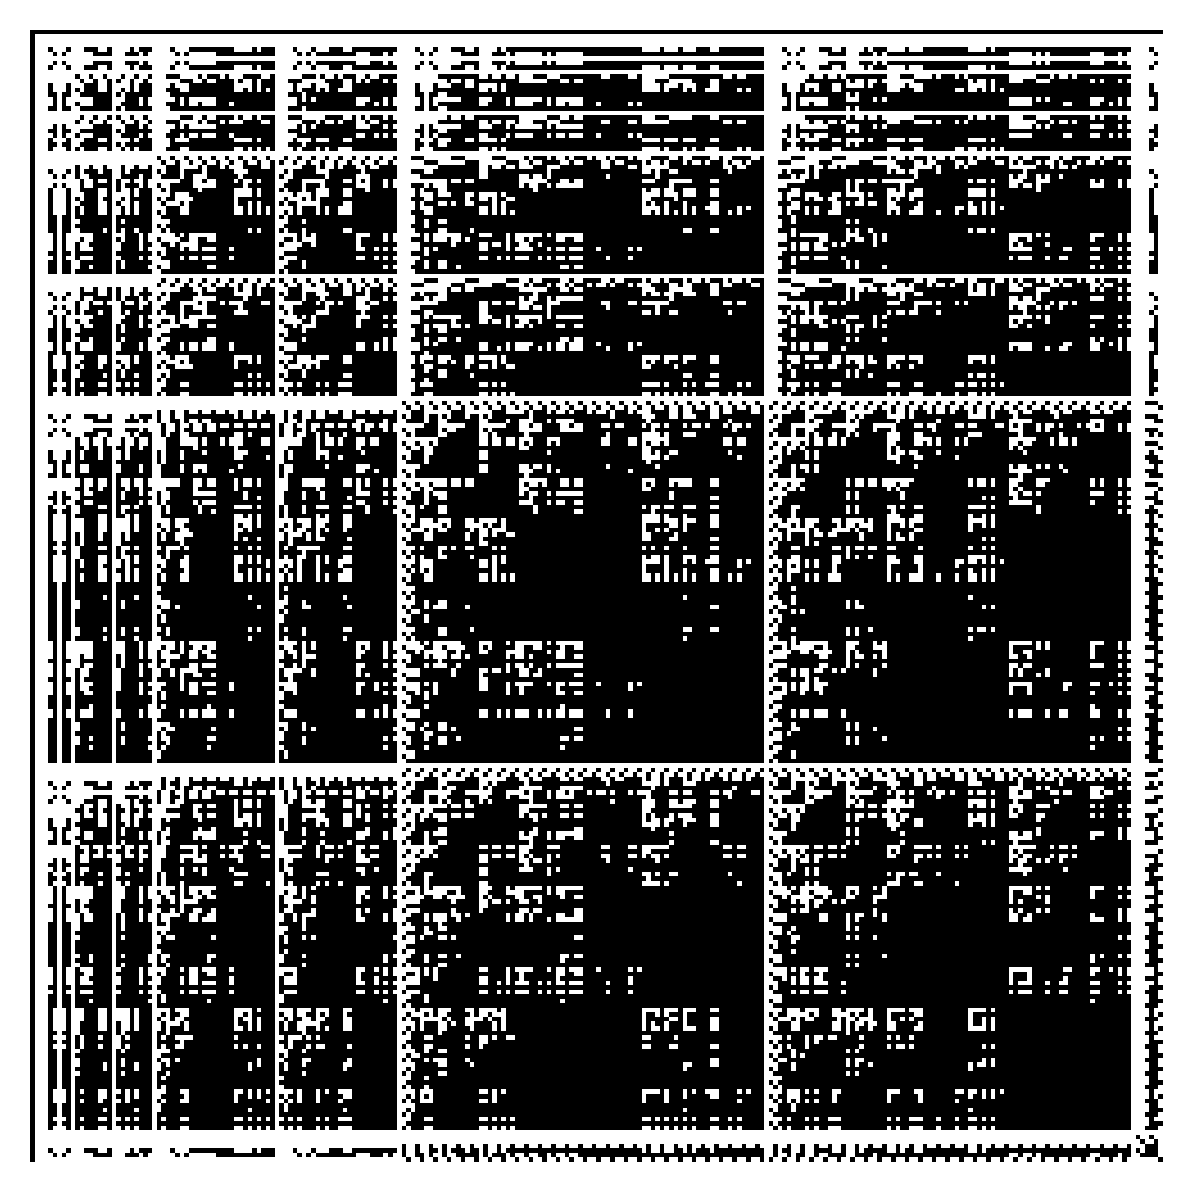

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import log
from tqdm import tqdm

def draw_grid(grid):
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                        'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                        'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    cmap = 'gist_gray'
    print(cmap)
    size = 5
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(grid, cmap = cmap)#, interpolation='bicubic' )
    plt.show()
    plt.close()

def mult_pol(s1, s2):
    res = [0]*(len(s1)+len(s2)-1)
    for o1,i1 in enumerate(s1):
        for o2,i2 in enumerate(s2):
            res[o1+o2] += i1*i2
    return res

def from_ternary(s):
    change = {0:0, 1:2, -1:1}
    #s = s[::-1]
    out = 0
    for k, v in enumerate(s):
        out += change[v]*(3**k)
    return out

def to_ternary(n):
    change = {0:0, 2:1, 1:-1}
    s = []
    while n > 0:
        r = n%3
        s.append(r)
        n = n//3
    return [ change[i] for i in s]#[::-1]

def print_m(M):
    print('[', ',\n  '.join(map(str, M)) , '],',)

N = 250


mm = [[0]*N for i in range(N)]

for i in tqdm(range(1,N)):
    for j in range(1,N):
        r = mult_pol(to_ternary(i ), to_ternary(j))

        if all(i == 1 or i == -1 or i == 0 for i in r):
            #print(i, j, from_ternary(r))
            mm[i][j] = 1 #log(from_ternary(r)+1)


        # if all(i == 1 or i == -1 or i == 0 for i in r) :
        #     count2 +=1

draw_grid(np.array(mm))



100%|██████████| 399/399 [00:02<00:00, 137.76it/s]


gist_gray


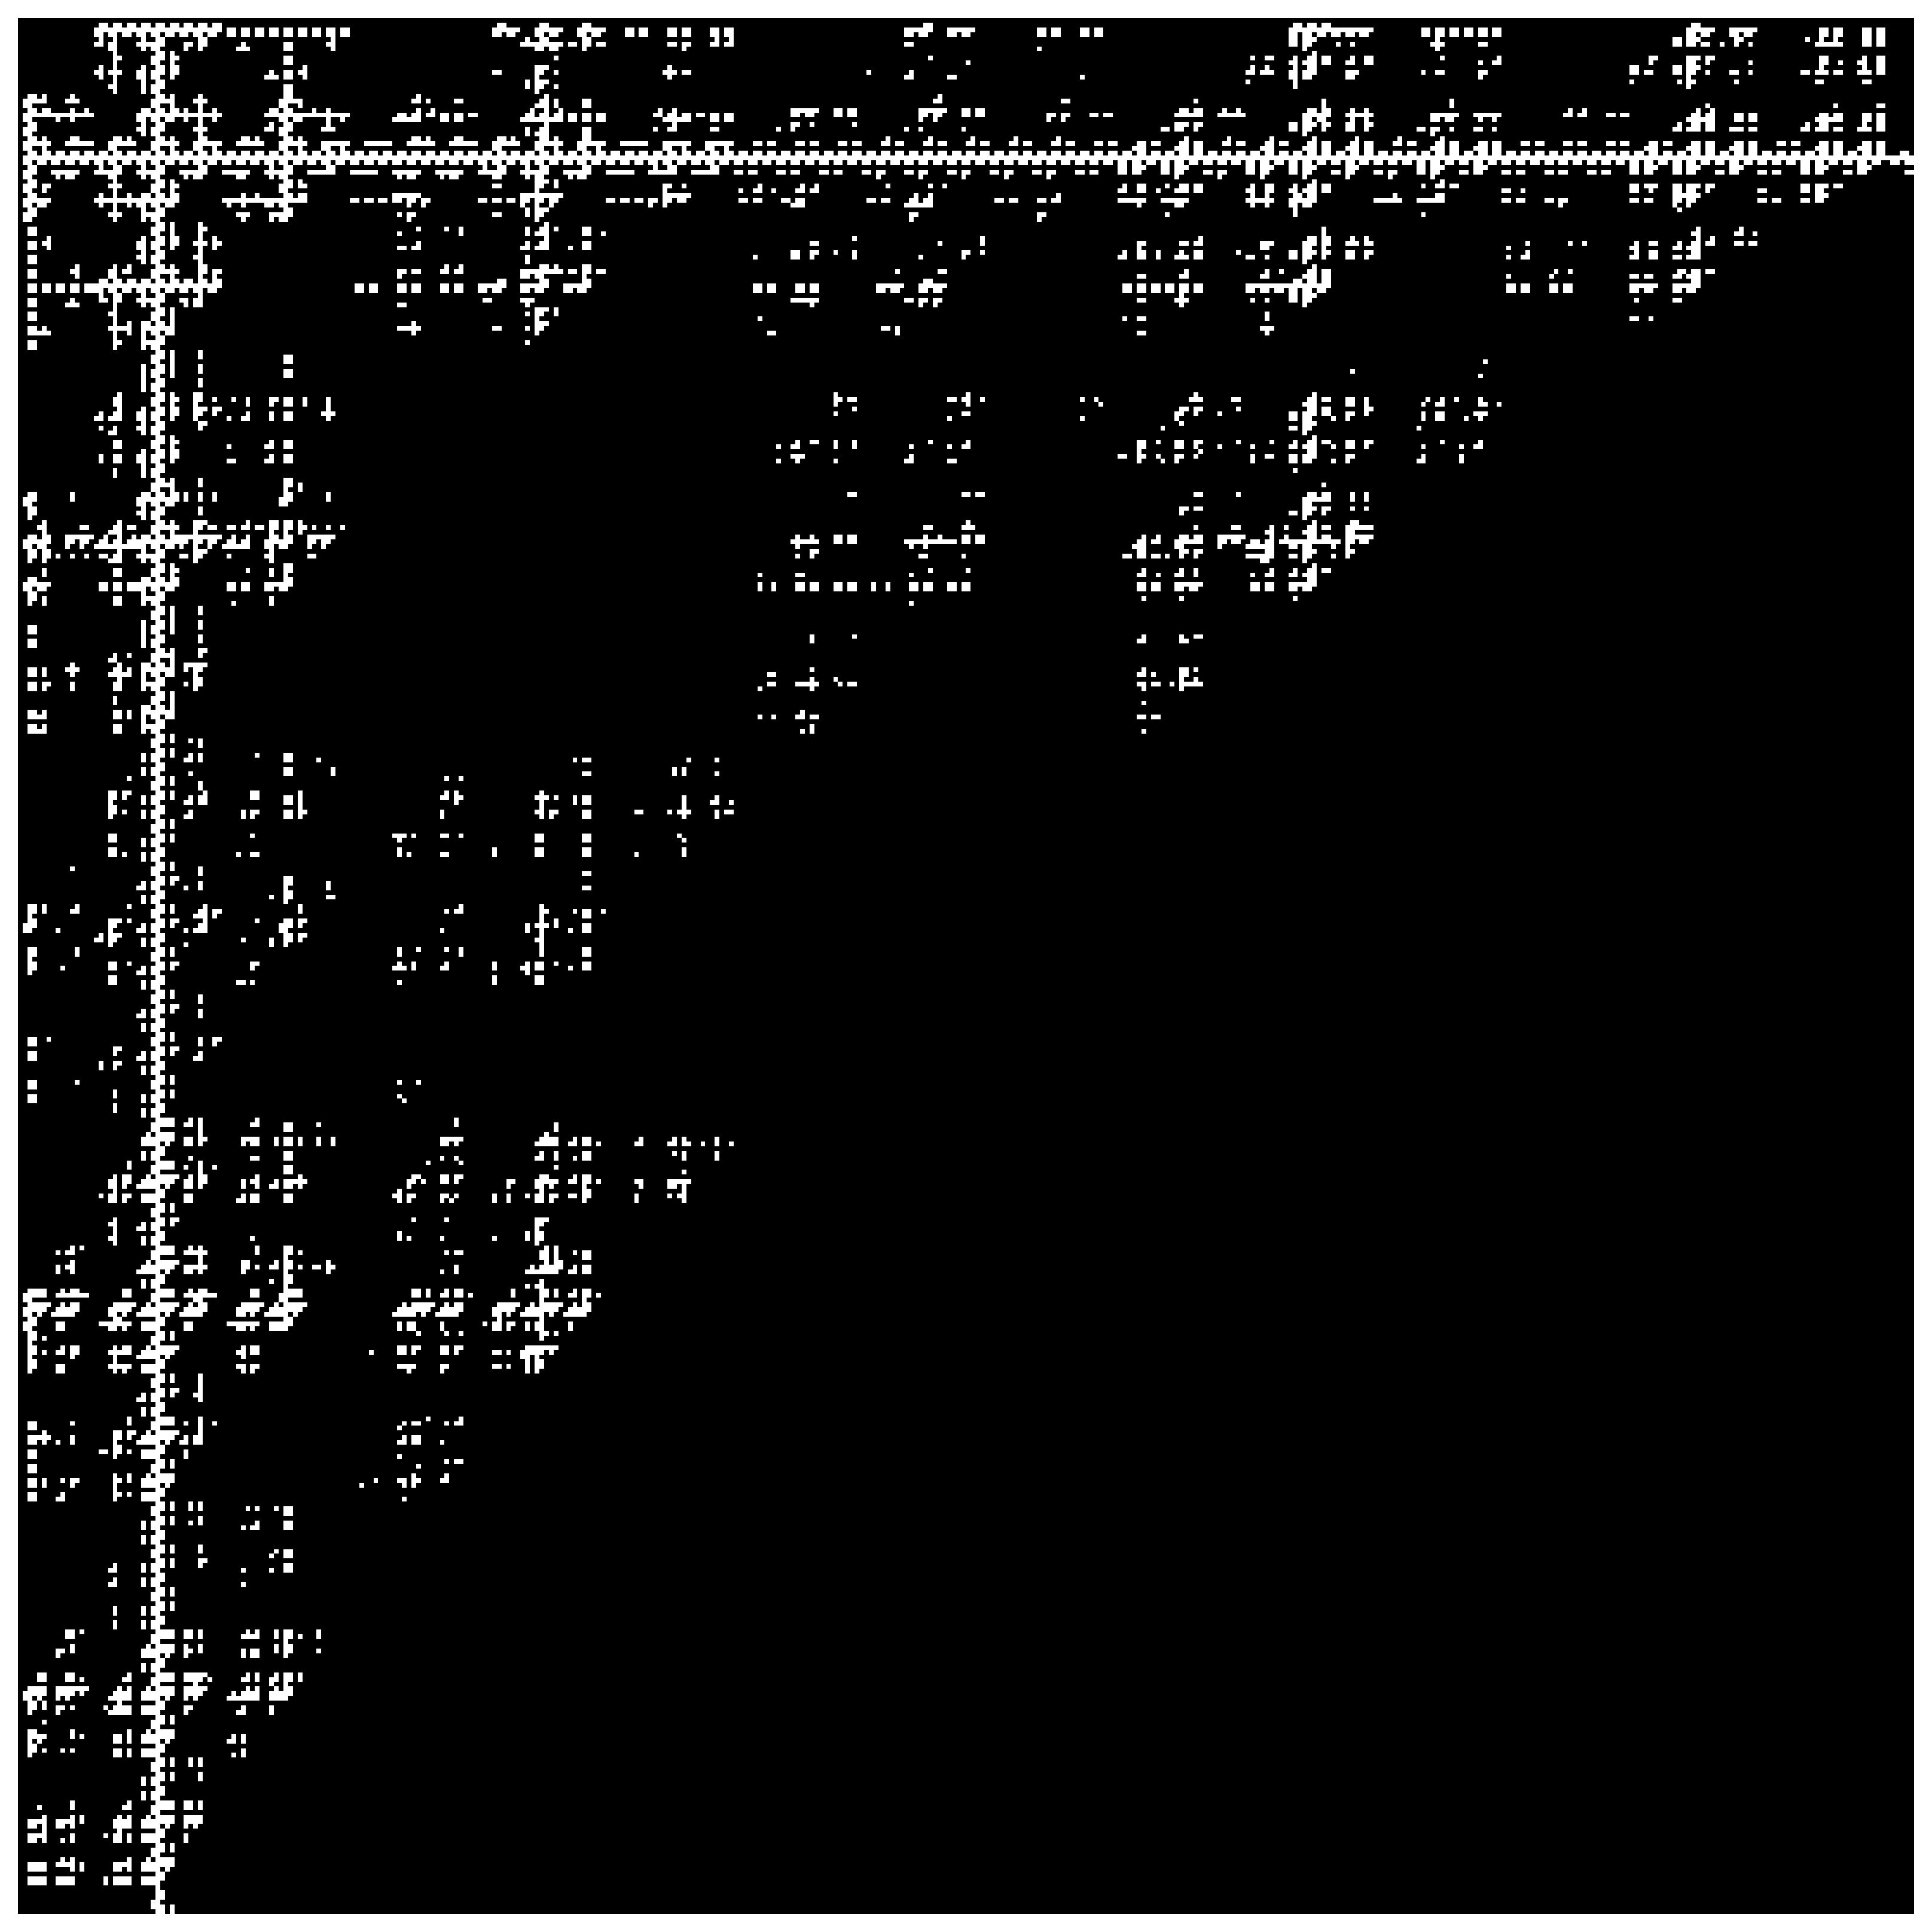

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from math import log
from tqdm import tqdm

def draw_grid(grid):
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                        'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                        'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    cmap = 'gist_gray'
    print(cmap)
    size = 14
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(grid, cmap = cmap)#, interpolation='bicubic' )
    plt.show()
    plt.close()

def mult_pol(s1, s2):
    res = [0]*(len(s1)+len(s2)-1)
    for o1,i1 in enumerate(s1):
        for o2,i2 in enumerate(s2):
            res[o1+o2] += i1*i2
    return res


def balancedTernary(n):
    output = ""
    while(n > 0):
        rem = n % 3
        n = n // 3
        if(rem == 2):
            rem = -1
            n += 1
        if(rem == 0):
            output = '0' + output
        else:
            if(rem == 1):
                output = '1' + output
            else:
                output = '2' + output
    change = {'0':0, '2':-1, '1':1}
    out = [change[i] for i in output][::-1]
    return out

def from_ternary(s):
    change = {0:0, 1:2, -1:1}
    #s = s[::-1]
    out = 0
    for k, v in enumerate(s):
        out += change[v]*(3**k)
    return out

def to_ternary(n):
    change = {0:0, 2:1, 1:-1}
    s = []
    while n > 0:
        r = n%3
        s.append(r)
        n = n//3
    return [ change[i] for i in s]#[::-1]

def print_m(M):
    print('[', ',\n  '.join(map(str, M)) , '],',)

N = 400


mm = [[0]*N for i in range(N)]

out = set()

c = 1
dt = 700
for i in tqdm(range(1, N)):
    for j in range(1, N):
        r = mult_pol(balancedTernary(i + dt), balancedTernary(j+ dt))

        if all(i == 1 or i == -1 or i == 0 for i in r):

            mm[i][j] = 1


draw_grid(mm)



In [ ]:

def to_ternary(n):
    change = {0:0, 2:1, 1:-1}
    s = []
    while n > 0:
        r = n%3
        s.append(r)
        n = n//3
    return [ change[i] for i in s]#[::-1]

#18 15 135
to_ternary(135)

[0, 0, 0, 1, -1]